# Data-Driven Insights into Heart Disease Predictions: Analysing cardiovascular diseases

| Candidate number                  |
| ------------------------------------ |
| 2509897 |

## Project summary

This project focuses on using data analytics to address the main challenges in healthcare,specifically predicting heart disease risk.The aim of this project is to uncover patterns and relationships that can inform early detection and prevention policies.By applying statistical and machine learning techniques,this analysis aims to convey actionable insights,improving decision making in medical practice.This study of data highlights the transformative potential of data driven approaches in enhancing healthcare outcomes and promoting evidence relied strategies.

## Generative AI

In this assessment, I used artificial intelligence tools to assist with coding by providing guidance on syntax, generating visualizations, and supporting data analysis, ensuring originality as all outputs were adapted and tailored to meet the specific requirements of the project without plagiarism.

## Introduction

Healthcare analytics dramatically transfigures the way medical professionals predict,prevent,and manage diseases.The project mainly focuses on leveraging data driven techniques to forecast the danger of heart disease which is a leading cause of morbidity and mortality worldwide.Analysing the detail and broad dataset contains patient attributes such as age,gender,cholesterol levels,chest pain types,and exercises-induced angina,this project reveal the patterns and relationship that can improve early diagonosis and strategies for intervention.
The absolute aim of this project is to build a predictive model that helps in accurately identifying individuals at risk of heart disease.By the assistance of this model,healthcare providers can make informed decisions,enabling proactive measures that will reduce the risk of mortality and healthcare costs.

The main objectives of this project are:

 1. Create a reliable and accurate machine learning model to identify individuals at risk of heart disease.
 2. Perform data preprocessing to ensure a tidy and authentic data
 3. Explore the dataset to understand and identify key elements causes the risk of heart disease.
 4. Use performance metrics such as accuracy, precision, recall, and AUC-ROC to validate the predictive model's reliability.
 5. provide actionable insights and recommendationson the basis of the analysis by highlighting the strategies for prevention and improved       patient care.


## Setup

Link to access the notebook and all the data files: https://github.com/Gouri-hub/Gouri-Dinesh-Individual-Assessment

### Import necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [15]:
data_source = "heart.csv"
df = pd.read_csv(data_source)

### Convert into DataFrame

In [17]:

df['HeartDisease'] = df['HeartDisease'].astype('category')

Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [19]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope HeartDisease  
0              N      0.0       Up            0  
1              N      1.0     Flat            1  
2              N      0.0       Up            0  
3              Y      1.5     Flat            1  
4              N      0.0       Up            0  


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 80.0+ KB
None


## Data management

### Data cleaning

In [23]:
# TODO: Handle missing values
print("Missing values in each column before cleaning:")
print(df.isnull().sum())

# Replace missing values in numeric columns with the median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Replace missing values in categorical columns with the most frequent value
for col in df.select_dtypes(include=['object', 'category']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

Missing values in each column before cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [24]:
# TODO: Convert data types where necessary
# Your code here
df['HeartDisease'] = df['HeartDisease'].astype('category')

In [25]:
# TODO: Remove any duplicate entries
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates
if duplicates > 0:
    df = df.drop_duplicates()


Number of duplicate rows: 0


In [26]:
# TODO: Anything else?
#Remove unnecessary columns
#Drop columns with too many missing values (e.g., >50% missing)
threshold = 0.5  # 50% threshold
columns_to_drop = [col for col in df.columns if df[col].isnull().mean() > threshold]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

### Data wrangling

In [28]:
# TODO: Create at least one new column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100],labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [29]:
# TODO: Combine at least two columns
df['Sex_ChestPain'] = df['Sex'] + "_" + df['ChestPainType']

In [30]:
# TODO: Extract data from multiple columns to create a new column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100],labels=['Young', 'Middle-Aged', 'Senior', 'Elderly'])

In [31]:
# TODO: Anything else?
# Display modified data
print("\nData after wrangling:")
print(df.head())


Data after wrangling:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope HeartDisease    Age_Group Sex_ChestPain  
0              N      0.0       Up            0  Middle-Aged         M_ATA  
1              N      1.0     Flat            1  Middle-Aged         F_NAP  
2              N      0.0       Up            0  Middle-Aged         M_ATA  
3              Y      1.5     Flat            1  Middle-Aged         F_ASY  
4              N      0.0       Up            0       Senior         M_NAP  


## Data analysis

In [33]:
# TODO: Conduct data analysis
print("\nSummary statistics:")
print(df.describe())

# Correlation matrix (numerical columns)
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if numeric_columns.empty:
    print("\nNo numeric columns found for correlation matrix.")
else:
    # Step 3: Compute and print the correlation matrix
    print("\nCorrelation matrix (numeric columns):")
    correlation_matrix = numeric_columns.corr()
    print(correlation_matrix)

print("\nCorrelation matrix:")



Summary statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000

Correlation matrix (numeric columns):
                  Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
Age          1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612
RestingBP    0.254399   1.000000     0.100893   0.070193 -0.112135  0.16480

## Data visualisation

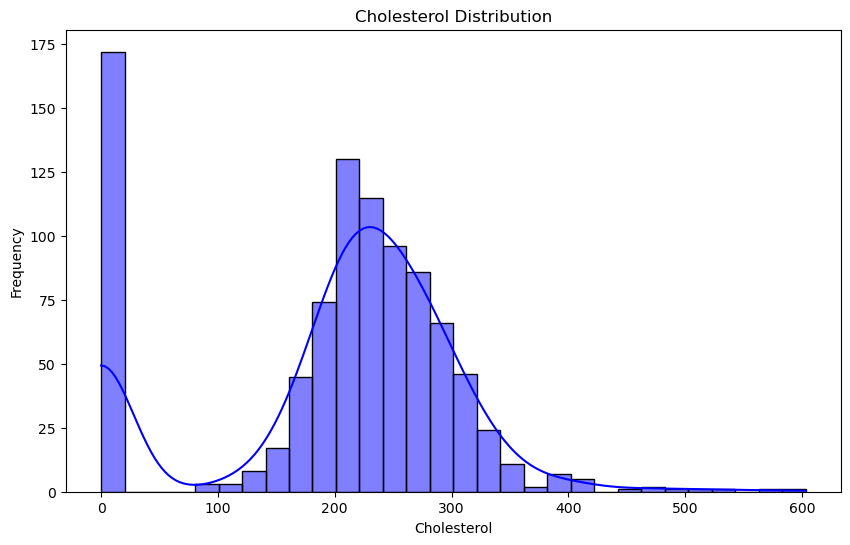

In [36]:
# Visualization 1: Distribution of cholesterol levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], kde=True, bins=30, color='blue')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
vis1_path=r"C:\Users\Afsal\Downloads\Gouri\cholestrol_distribution.png"
plt.show()

This visualisation represents the distribution of cholesterollevels in the dataset using a histogram with a Kernel Density Estimate(KDE) overlay.The X-axis indicates cholestrol levels,measured in mg/dL and the Y-axis represents the number of individuals falling into each cholesterol range.The KDE curve provides a smooth estimate of the data distribution,highlighting the probability desnsity across cholestrol levels. 

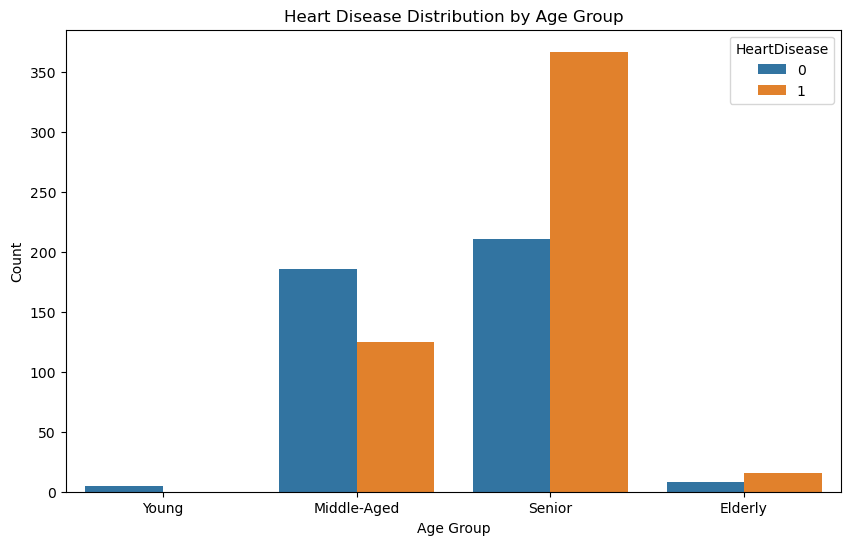

In [37]:
# Visualization 2: Heart Disease by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='HeartDisease', data=df)
plt.title('Heart Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
vis2_path=r"C:\Users\Afsal\Downloads\Gouri\heart_disease_by_age_group.png"
plt.show()

This visualization highlights heart disease prevalence across age groups. It shows which age groups have higher counts of individuals with heart disease, emphasizing age as a potential risk factor. Older groups likely have a higher prevalence, guiding targeted healthcare interventions.








## Data export

In [39]:
# TODO: Save the cleaned and wrangled DataFrame to a new CSV file
cleaned_data_path = r"C:\Users\Afsal\Downloads\Gouri\cleaned_heart.csv"
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data exported successfully to: {cleaned_data_path}")

Cleaned data exported successfully to: C:\Users\Afsal\Downloads\Gouri\cleaned_heart.csv


In [40]:
# TODO: Ensure that you can successfully load the exported CSV file
exported_csv_path = cleaned_data_path
try:
    loaded_df = pd.read_csv(exported_csv_path)
    print(f"\nExported CSV file successfully loaded from: {exported_csv_path}")
    
    # Step 3: Display basic information about the loaded DataFrame
    print("\nLoaded DataFrame Info:")
    print(loaded_df.info())
    
    print("\nFirst few rows of the loaded DataFrame:")
    print(loaded_df.head())
    
except FileNotFoundError:
    print(f"\nError: The file at {exported_csv_path} was not found.")
except Exception as e:
    print(f"\nAn error occurred while loading the CSV file: {e}")



Exported CSV file successfully loaded from: C:\Users\Afsal\Downloads\Gouri\cleaned_heart.csv

Loaded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  Age_Group       918 non-null    object 
 13  Sex_ChestPain   918 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 100

In [41]:
# TODO: Export visualizations as image files
plt.savefig(vis1_path)
plt.savefig(vis2_path)

<Figure size 640x480 with 0 Axes>

## Conclusion

This study provided valuable insights into heart disease risk factors,emphasizing the distribution of cholesterol levels and the prevalence of heart disease across age groups.These findings underscore the potential of data analytics in addressing significant public health challenges,particularly in identifying and mitigating cardiovascular risks.By analysing cholesterol ranges and outliers,which are critical for risk stratification.Similarly,the age-group analysis revealed the rising prevalence of heart disease with age as a major risk.

Despite the strengths of this analysis,several limitations should be noted.First the dataset may lack diversity in terms of demographic representation ,such as geographic or ethnic diversity,which could impact the generalizability of the findings.Second,the study focused on cholesterol and age,potentially overlooking other important risks factors such as family history,lifestyle choices,and co-existing medical conditions.Third,the data quality could be a concern as issues like missing values,measurementt errors,or inconsistenciesmight skew the results.Lastly,the reliance on visualisations and statistical tools,without advanced predictive modeling,limits the depth of actionable insights.

The insights from this analysis carry several practicall implications for healthcare managers and policymakers.For healthcare providers,the findings can inform the development of targeted screening and intervention programs.Identifying high-risk groups,such as individuals with elevated cholesterol levels or those in older age brackets,allows for efficient allocation of resources to prevention and treatment efforts.Additionally,the results support the implementation of health education campaigns focused on lifestyle modifications,including promoting healthy diets,physical activities and routine health check-ups.
For insurance companies,the insights can guide the design of policies that incentivize preventive care and reward healthy behaviours.Employers,too,can benefit by integrating health analytics into workplace wellness programs,which can improve employee health outcomes and reduce absenteeism.

To enhance the robustness and relevance of future analysis,several improvements can be made.First,expanding the dataset to include a more diverse population would ensure broader applicability of the findings.Incorporating additional variables,such as smoking status,alcohol consumption,exercise habits, and genetic markers,would provide a more comprehensive view of heart disease risk factors.Second,advanced analytics techniques,such as machine learning models,can be employed to predict heart disease risk more accurately.These models can also identify complex interactions between variables that may not be evident in simpler analyses.Third,longitudinal data collection and analysis can shed light on how risk factors evolve over time and how early interventions impact outcomes.Lastly,collaboration with medical professionals and public health experts can help transalate analytical findings into practical,evidence-based strategies for improving population health.

Insights gained here provide a foundation for targeted interventions and resource optimization to improve public health outcomes.



## References

1. American Heart Association (2023). Understanding Cholesterol and Heart Disease. Retrieved from https://www.heart.org
2. Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
3. Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324
4. Framingham Heart Study. (2023). Heart Disease Risk Factors. Retrieved from https://www.framinghamheartstudy.org
5. Jupyter Project. (2023). The Jupyter Notebook Platform. Retrieved from https://jupyter.org


   

